In [8]:
# Code snippet that shows how to get a list of molgroups in the class. This could be useful for, e.g. adding up the contributions to all of the molgroups in an automated way (you can add another molecular group without explicitly adding it to the sum)

In [9]:
import molgroups as mol

In [13]:
# instantiate an instance of BLM_quaternary_1
blm = mol.BLM_quaternary()

# this list comprehension looks at all attributes of bm and picks out all of them that have a class name (e.g. Box2Err, etc.) that matches a class name in molgroups)
submol = [attr for attr in dir(blm) if type(getattr(blm, attr)).__name__ in dir(mol)]

print(submol)

['defect_headgroup', 'defect_hydrocarbon', 'headgroup1', 'headgroup1_2', 'headgroup1_3', 'headgroup2', 'headgroup2_2', 'headgroup2_3', 'lipid1', 'lipid2', 'methyl1', 'methyl2']


In [18]:
# make a reasonable bilayer (using Frank's X-ray example)
maxarea = 100
stepsize = 0.5
dimension = 300

na1, nh1, nm1, va1, vm1, vh1, lh1 = 0.00760, 0.00461, 0.000468, 972.00, 98, 331.00, 9.56 
na2, nh2, nm2, va2, vm2, vh2, lh2 = 0, 0, 0, 0, 0, 0, 0 
na3, nh3, nm3, va3, vm3, vh3, lh3 = 0, 0, 0, 0, 0, 0, 0
vc, nc = 0, 0
blm.fnInit(va1, na1, vm1, nm1, vh1,nh1, lh1, va2, na2, vm2, nm2, 
                        vh2, nh2, lh2, va3, na3, vm3, nm3, vh3, nh3,lh3, vc, nc)

sigma, bulknsld, startz, l_lipid1, l_lipid2, vf_bilayer = 2.0, 9.4114E-06, 50, 11.6, 11.6, 1
blm.fnSet(sigma, bulknsld, startz, l_lipid1, l_lipid2, vf_bilayer)

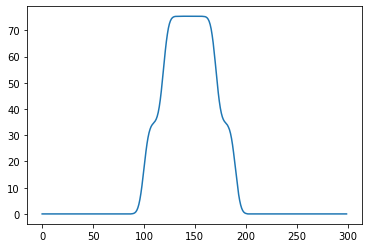

In [20]:
# this could be used to add up all the areas, for example:
import matplotlib.pyplot as plt
import numpy as np

submol = [getattr(blm, attr) for attr in dir(blm) if type(getattr(blm, attr)).__name__ in dir(mol)]
totalArea = np.zeros(dimension)
for mg in submol:
    dd, aArea, anSL = mg.fnWriteProfile([0]*dimension, [0]*dimension, dimension, stepsize, maxarea)
    totalArea += np.array(aArea)

plt.plot(totalArea)
plt.show()
